In [2]:
import cv2
import matplotlib.pyplot as plt

(-0.5, 96.5, 196.5, -0.5)

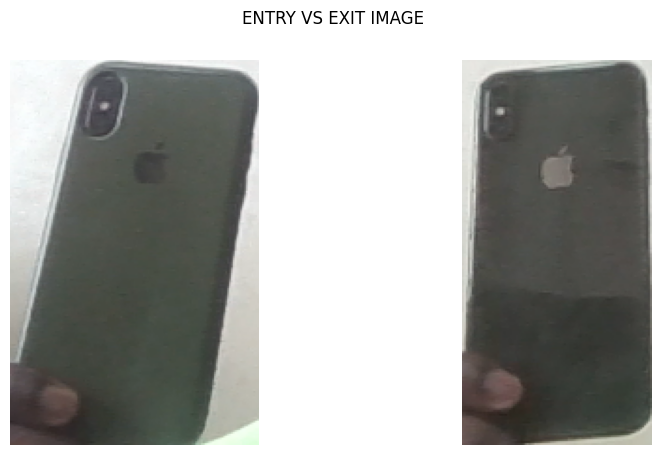

In [175]:
img1 = cv2.imread('./../../data/ObjectsDetected/2023-06-13/10827454/entry/cell phone.png')
img2 = cv2.imread('./../../data/ObjectsDetected/2023-06-13/10827454/exit/cell phone.png')

#write image correctly
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
fig.suptitle('ENTRY VS EXIT IMAGE')
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')

(-0.5, 96.5, 196.5, -0.5)

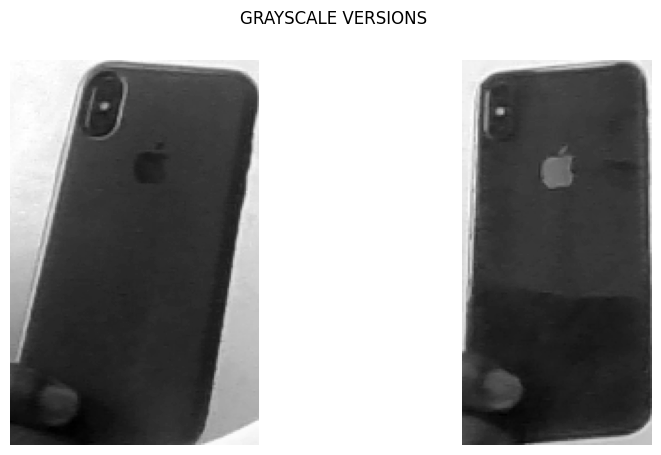

In [176]:
#convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
fig.suptitle('GRAYSCALE VERSIONS')
axes[0].imshow(gray1, cmap='gray')
axes[0].axis('off')
axes[1].imshow(gray2, cmap='gray')
axes[1].axis('off')

(-0.5, 96.5, 196.5, -0.5)

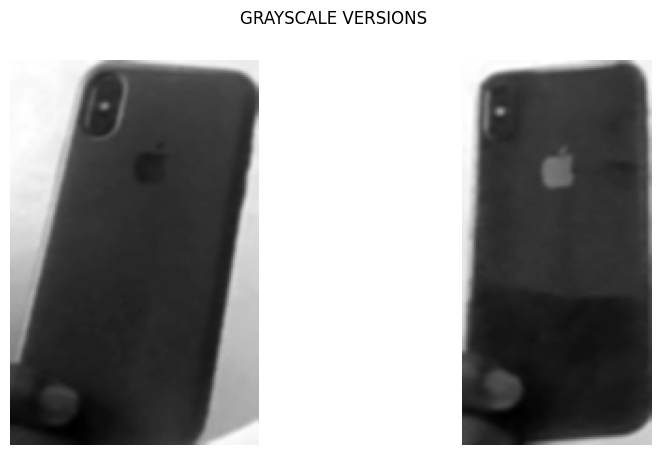

In [177]:
# Apply Gaussian blur
gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)
gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
fig.suptitle('GRAYSCALE VERSIONS')
axes[0].imshow(gray1, cmap='gray')
axes[0].axis('off')
axes[1].imshow(gray2, cmap='gray')
axes[1].axis('off')

In [178]:
# Step 1: Size comparison
size_a = gray1.shape[:2]  # Get dimensions of image A
size_b = gray2.shape[:2]  # Get dimensions of image B

# Compare the dimensions of the two devices
ratioA = abs(1- (float(size_a[0])/size_b[0]))
ratioB = abs(1- (float(size_a[1])/size_b[1]))

if ratioA < 0.7 and ratioB < 0.7:
    print("The devices have the same size.")
    print(ratioA,"  ", ratioB)
else:
    print("The devices have different sizes.")

The devices have the same size.
0.045685279187817285    0.3711340206185567


209.3298797607422    589.7660522460938
341.6913757324219    384.1041564941406
552.7703247070312    560.3731079101562
419.9130859375    502.5196533203125
518.8410034179688    531.0809936523438
532.572998046875    578.5628662109375
209.3298797607422    589.7660522460938
341.6913757324219    384.1041564941406
552.7703247070312    560.3731079101562
419.9130859375    502.5196533203125
518.8410034179688    531.0809936523438
532.572998046875    578.5628662109375
1     3


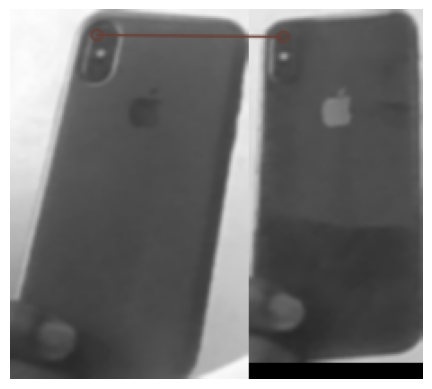

In [181]:
# Create a SIFT object
sift = cv2.SIFT_create()

# Extract SIFT keypoints and descriptors for the objects
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Create a FLANN matcher
flann = cv2.FlannBasedMatcher()

# Match the descriptors of the objects
matches = flann.knnMatch(des1, des2, k=2)

#-------------------------------------------------------------------------------------
# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    print(m.distance, "  ", n.distance)
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

#compare with other good matches
benchMarkMatches = []
for m, n in matches:
    print(m.distance, "  ", n.distance)
    
    if m.distance < 0.9 * n.distance:
        benchMarkMatches.append(m)

# Draw the match image result
match_image = cv2.drawMatches(gray1, kp1, gray2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

print(len(good_matches),"   ", len(benchMarkMatches))

# Show the match image result
# Create a Matplotlib figure and axis
fig, ax = plt.subplots()
ax.imshow(match_image)
ax.axis('off')

# Show the plot
plt.show()

In [167]:
simRatio = float(len(good_matches)/len(benchMarkMatches))
print(simRatio)

if(simRatio > 0.7):
    print("SIMILARITY CHECKER PASSED SUCCESSFULLY")
else:
    print("SIMILARITY CHECKER FAILED.. DEVICE DOES NOT BELONG TO YOU")


0.0
SIMILARITY CHECKER FAILED.. DEVICE DOES NOT BELONG TO YOU
